In [7]:
import numpy as np
from scipy import integrate
from scipy.special import erf

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt


### **Нормальное распределение**

$$
p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right) \quad \text{(probabilty density function)}
$$

$$
F(x) = P(X \leq x) = \int_{-\infty}^{x} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(t - \mu)^2}{2\sigma^2} \right) dt \quad \text{(cummulative function)}
$$
\
\
\

$$
F(x) = \frac{1}{2} \left[ 1 + \operatorname{erf} \left( \frac{x - \mu}{\sigma \sqrt{2}} \right) \right]
$$

Where:

- ($\mu$) is the mean  
- ($\sigma$) is the standard deviation  
- ($\operatorname{erf}$) is the error function


In [8]:
def pdf_norm(x, a=0, sigma=1):
    return 1 / (sigma * (2 * np.pi) ** 0.5) * np.exp(-((x - a)**2) / (2 * sigma**2))

def cdf_norm(x, a=0, sigma=1):
    return integrate.quad(pdf_norm, -np.inf, x, args=(a, sigma))


#Альтернативный вариант через функцию Лапласса
def laplas(z):
    return erf(z / 2 ** 0.5) * 0.5

def cdf_norm_vec(z):
    return laplas(z) + 0.5


#print("Probabily by laplas: ", cdf_norm_vec(2))  # Should print approximately 1
#print("Probabily by general: ", cdf_norm(3, 1, 1))  # Should print approximately 1


In [10]:
laplas(1.96)* 2

np.float64(0.9500042097035591)

In [86]:
def generate_colors(n):
    cmap = plt.cm.get_cmap('tab10' if n <= 10 else 'hsv', n)
    return [f'rgb({int(r*255)},{int(g*255)},{int(b*255)})' for r, g, b, _ in cmap(np.linspace(0, 1, n))]

colors = generate_colors(4)





params = [(0, 1), (0, 3), (3, 1), (3, 3)]
low = min([stat[0] - 4 * stat[1] for stat in params])
up = max([stat[0] + 4 * stat[1] for stat in params])


x = np.linspace(low, up, 500)

y_pdf = [pdf_norm(x, stat[0], stat[1]) for stat in params]
y_cdf = [cdf_norm_vec((x - stat[0]) / stat[1]) for stat in params]

colors = generate_colors(len(params))

fig = make_subplots(rows=2, 
                    cols=1, 
                    shared_xaxes=True,
                    subplot_titles=["PDF", "CDF"],
                    vertical_spacing=0.03)


for i in range(len(params)):
    fig.add_trace(go.Scatter(x=x, y=y_pdf[i],
                             name=f'a = {params[i][0]}, sigma = {params[i][1]}',
                             line=dict(color=colors[i])), row=1, col=1)
    
    fig.add_trace(go.Scatter(x=x, y=y_cdf[i],
                             name=f'a = {params[i][0]}, sigma = {params[i][1]}',
                             line=dict(color=colors[i], dash='dash'),
                             showlegend=False), 
                             row=2, col=1)

fig.update_layout(
    title="Normal distribution", 
    title_x = 0.5,
    title_font=dict(size=24, family="Arial", color="black"),
    legend=dict(x=1, y=1, xanchor='right', yanchor='top', orientation='v'),
    hovermode="closest",
    template="none",
    margin=dict(l=30, r=0, t=60, b=20),
    width=800,
    height=1200
)

fig.update_xaxes(title='X value', col=1, row=2, zeroline=False)
fig.update_xaxes(col=1, row=1, zeroline=False)


fig.update_traces(hoverinfo="all", hovertemplate="x: %{x}<br>y: %{y}")
fig.show()

C:\Users\vlads\AppData\Local\Temp\ipykernel_19804\3337396363.py:2: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



In [19]:
print('Main func without z norm : ', cdf_norm(1070, 1000, 5)[0] - cdf_norm(1005, 1000, 5)[0])
print('Main func with z norm : ', cdf_norm((1070 - 1000) / 5)[0] - cdf_norm((1005 - 1000) / 5)[0])
print('Additional func with z norm : ', cdf_norm_vec((1070 - 1000) / 5) - cdf_norm_vec((1005 - 1000) / 5))

Main func without z norm :  0.15865525393145608
Main func with z norm :  0.15865525393145652
Additional func with z norm :  0.15865525393145707


### **Гамма распределение**

$$
\Gamma(\lambda) = \int_{0}^{\infty} x^{\lambda-1} e^{-x} \, dx, \quad \lambda > 0
$$

Говорят, что $\xi$ имеет гамма-распределение с параметрами α > 0, λ > 0, и пишут: $\xi \subseteq \Gamma_{\alpha, \lambda}$, если СВ обладает следующей функцией распределения

$$
pdf(x) =
\begin{cases}
\displaystyle \frac{\alpha^\lambda}{\Gamma(\lambda)} \, x^{\lambda - 1} e^{-\alpha x}, & x > 0 \\\\
0, & x \leq 0
\end{cases}
$$ 
\\

$$
cdf(x) =
\begin{cases}
\displaystyle \frac{\alpha^\lambda}{\Gamma(\lambda)} \, \int_{0}^{x}t^{\lambda - 1} e^{-\alpha t} dt, & x > 0 \\\\
0, & x \leq 0
\end{cases}
$$

In [103]:
from scipy.special import gdtr
from scipy.stats import gamma as gamma_sc

from matplotlib.widgets import Slider



In [3]:
def gamma(lamb):
    func = lambda x: np.exp(-x)*x**(lamb-1)
    return integrate.quad(func, 0, np.inf)[0]

def pdf_gamma(x, a, lamb):
    return (a ** lamb) / gamma(lamb) * (x**(lamb-1))*np.exp(-a*x)

def cdf_gamma(x, a, lamb):
    return np.array([integrate.quad(pdf_gamma, 0, x_0, args=(a, lamb))[0] for x_0 in x])





In [4]:
x = np.linspace(0.0001, 5, 200)
a, lamb = 1, 2

pdf_quad = pdf_gamma(x, a, lamb)
pdf_vec = gamma_sc.pdf(x, lamb, scale=1/a)

print("PDF check: ", np.allclose(pdf_quad, pdf_vec))  # Should be True
#print("Quad: ", pdf_quad)
#print("Vec: ", pdf_vec)

cdf_quad = cdf_gamma(x, a, lamb)
cdf_vec =  gdtr(a, lamb, x)



print("CDF check: ", np.allclose(cdf_quad, cdf_vec))  # Should be True
#print("Quad: ", cdf_quad)
#print("Vec: ", cdf_vec)

PDF check:  True
CDF check:  True


In [16]:
xticks = np.arange(0.50, 101, 20)
xlabels = [f'${x:1.2f}' for x in xticks]
print(xlabels)


['$0.50', '$20.50', '$40.50', '$60.50', '$80.50', '$100.50']


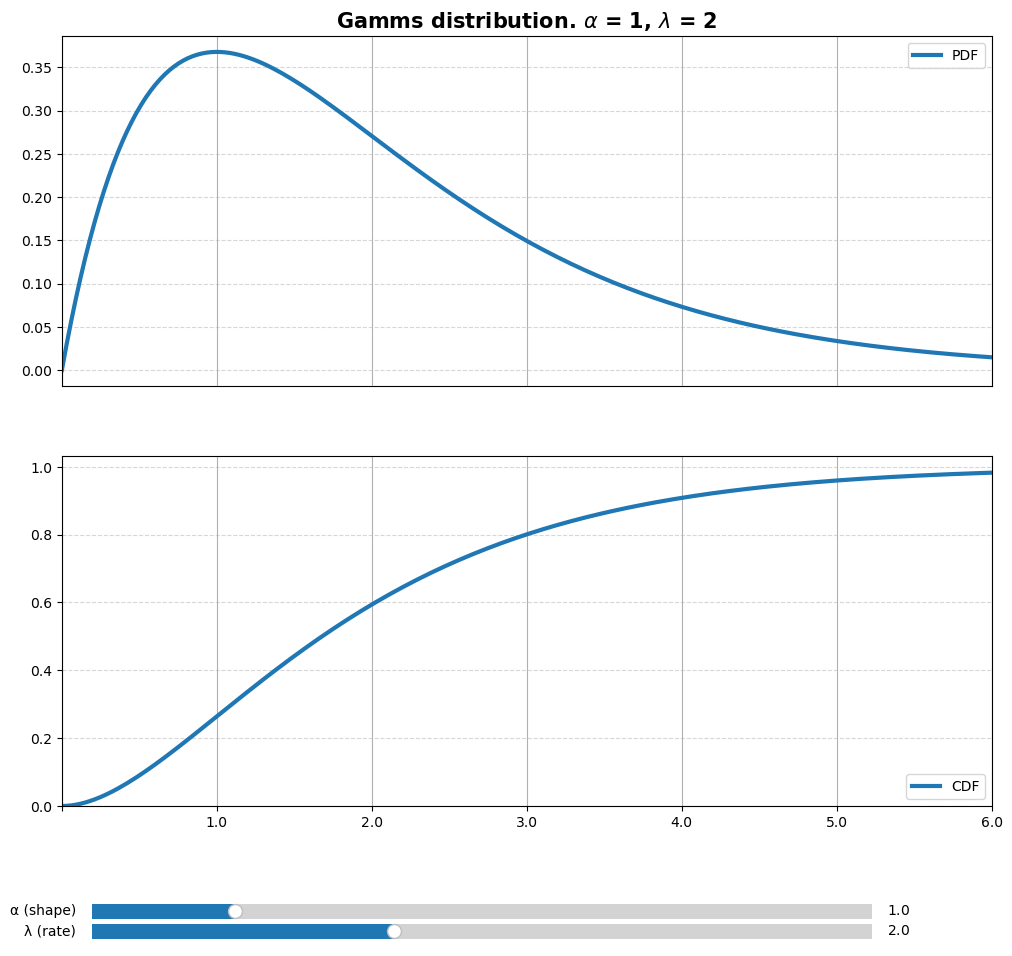

In [107]:
x = np.linspace(0.0001, 6, 200)

# Initial values
a_init = 1
lamb_init = 2


pdf_dist = pdf_gamma(x, a_init, lamb_init)

cdf_dist = gdtr(a_init, lamb_init, x)

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12, 10))

pdf_line, = axes[0].plot(x, pdf_dist, label='PDF', lw=3)
axes[0].set_title(f'Gamms distribution. $\\alpha$ = {a}, $\\lambda$ = {lamb}', fontsize=15, fontweight='bold')
axes[0].tick_params(axis='x', which='both', bottom=False, top=False)
axes[0].grid(axis='x')
axes[0].grid(axis='y', alpha=0.5, linestyle='--')
axes[0].legend()

cdf_line, = axes[1].plot(x, cdf_dist, label='CDF', lw=3)
#axes[1].set_xticks(np.arange(0, 5, 0.2), minor=True)
#axes[1].set_xticks(np.arange(0, 6, 1))
#axes[1].set_xticklabels([''] + [str(i) for i in range(1, int(max(x)) + 1)])
ticks = axes[1].get_xticks()
axes[1].set_xticks(ticks)
axes[1].set_xticklabels(['' if tick == 0 else str(tick) for tick in ticks])

axes[1].set_xlim(left=0, right=max(x))
axes[1].set_ylim(bottom=0)
axes[1].grid(axis='x')
axes[1].grid(axis='y', alpha=0.5, linestyle='--')
axes[1].legend(loc='lower right')


# Define sliders
ax_a = plt.axes([0.15, -0.01, 0.65, 0.03])
ax_lamb = plt.axes([0.15, -0.03, 0.65, 0.03])

slider_a = Slider(ax_a, 'α (shape)', 0.1, 5.0, valinit=a_init, valstep=0.1)
slider_lamb = Slider(ax_lamb, 'λ (rate)', 0.1, 5.0, valinit=lamb_init, valstep=0.1)

# Update function
def update(val):
    a = slider_a.val
    lamb = slider_lamb.val
    new_pdf = pdf_gamma(x, a, lamb)
    new_cdf = gdtr(a, lamb, x)

    pdf_line.set_ydata(new_pdf)
    cdf_line.set_ydata(new_cdf)

    axes[0].set_title(f'Gamma distribution. $\\alpha$ = {a:.1f}, $\\lambda$ = {lamb:.1f}', fontsize=15, fontweight='bold')
    fig.canvas.draw_idle()

# Connect sliders to update function
slider_a.on_changed(update)
slider_lamb.on_changed(update)

plt.show()

$$
\frac{\xi_1^2 + \dots + \xi_n^2 - n}{\sqrt{2n}} =
\frac{\xi_1^2 + \dots + \xi_n^2 - nE\xi^2}{\sqrt{\frac{1}{n} D\xi^2}}
\Rightarrow N(0,1)
$$

$\lim_{n\to\infty} (\sqrt{2n} - \sqrt{2n - 1}) \Rightarrow 0$